#Imports

In [1]:
%tensorflow_version 2.x
#tensorflow and keras
import tensorflow as tf
from tensorflow import keras


import numpy as np
import matplotlib.pyplot as plt

#Dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist #load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() #split into testing and training

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape #looking at the dataset

(60000, 28, 28)

In [4]:
train_images[0, 23, 23]  #looking at one pixel

194

In [5]:
train_labels[:10] #looking at first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

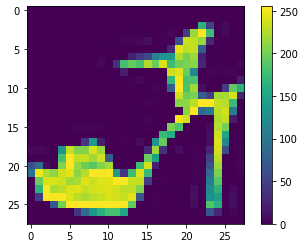

In [7]:
plt.figure()
plt.imshow(train_images[9])
plt.colorbar()
plt.show()  # Showing An image

#Data Preprocessing

In [8]:
train_images = train_images / 255.0

test_images = test_images / 255.0

#Building the model

In [9]:
model = keras.Sequential([
          keras.layers.Flatten(input_shape = (28, 28)), #input layer (1)
          keras.layers.Dense(128, activation='relu'), #hidden layer (2)
          keras.layers.Dense(10, activation='softmax') #output layer (3)
])

In [10]:
model.compile(optimizer='adam',                          #compiling the model
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs=10)   #building or "fitting " the model

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.4986 - accuracy: 0.8260
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3786 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3392 - accuracy: 0.8758
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3152 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2960 - accuracy: 0.8905
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2820 - accuracy: 0.8947
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2707 - accuracy: 0.8995
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2590 - accuracy: 0.9041
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2478 - accuracy: 0.9066
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.240

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)   #testing 

print('Test accuracy:', test_acc) 

313/313 [==============================] - 1s 2ms/step - loss: 0.3438 - accuracy: 0.8801
Test accuracy: 0.8801000118255615


#Making Predictions

In [13]:
test_images.shape  #looking at test_images

(10000, 28, 28)

Trouser


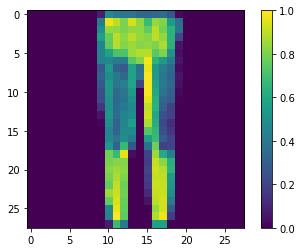

In [14]:
predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[3])])

plt.figure()
plt.imshow(test_images[3])
plt.colorbar()
plt.show()

In [15]:
predictions[0]  #looking at one prediction

array([3.72818967e-08, 4.10035339e-11, 1.46142325e-08, 2.52645083e-09,
       7.43466577e-09, 8.00810102e-03, 7.20013134e-08, 1.04152784e-02,
       1.10103024e-07, 9.81576443e-01], dtype=float32)

Pick a number24


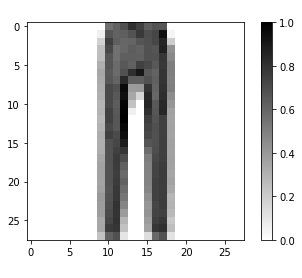

In [16]:
color = 'white'
plt.rcParams['text.color'] = color
plt.rcParams['axes.labelcolor'] = color

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)

def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title('Expected: '+ label)
  plt.xlabel("Guess: "+ guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
